# 유튜브 랭킹 시각화

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 유튜브랭크1000.csv to 유튜브랭크1000.csv


In [5]:
df = pd.read_csv(filename)
df.tail()

,카테고리,채널명,구독자수,뷰수,비디오수
995,[게임],미소,"510,000","210,770,000","3,084"
996,[미분류],밉지않은 관종언니,"510,000","67,740,000",170
997,[미분류],복지마블TV [Welfare Marble],"510,000","49,960,000",240
998,[음식/요리/레시피],Muggo,"510,000","183,720,000","1,388"
999,[게임],임선비,"510,000","234,290,000","1,134"


# 구독자수 --> 구독자수2(정수)

In [15]:
df['구독자수2'] = df.구독자수.apply(lambda x: int(x.replace(',','')))
df

,카테고리,채널명,구독자수,뷰수,비디오수,구독자수2
0,[음악/댄스/가수],BLACKPINK,"64,000,000","19,003,810,000",371,64000000
1,[음악/댄스/가수],HYBE LABELS,"60,300,000","18,713,050,000",654,60300000
2,[음악/댄스/가수],BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000
3,[음악/댄스/가수],SMTOWN,"28,500,000","21,870,920,000","3,729",28500000
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000
...,...,...,...,...,...,...
995,[게임],미소,"510,000","210,770,000","3,084",510000
996,[미분류],밉지않은 관종언니,"510,000","67,740,000",170,510000
997,[미분류],복지마블TV [Welfare Marble],"510,000","49,960,000",240,510000
998,[음식/요리/레시피],Muggo,"510,000","183,720,000","1,388",510000


In [16]:
def str2int(x):
  return int(x.replace(',',''))
  

In [17]:
df['비디오수2'] = df.비디오수.apply(str2int)
df.head()

,카테고리,채널명,구독자수,뷰수,비디오수,구독자수2,비디오수2
0,[음악/댄스/가수],BLACKPINK,"64,000,000","19,003,810,000",371,64000000,371
1,[음악/댄스/가수],HYBE LABELS,"60,300,000","18,713,050,000",654,60300000,654
2,[음악/댄스/가수],BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000,1579
3,[음악/댄스/가수],SMTOWN,"28,500,000","21,870,920,000","3,729",28500000,3729
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000,223


- 비디오수 Top20 (채널명, 비디오수) 막대 그래프

In [41]:
vt20 = df.pivot_table('비디오수2','채널명').sort_values(by='비디오수2', ascending=False).head(20)
vt20

,비디오수2
채널명,
YTN news,553462
연합뉴스TV,362555
SBS Drama,340878
SBS Entertainment,216725
KBS News,176159
Arirang News,123886
JTBC News,116376
MBCNEWS,115414
KBS Drama,114095


AttributeError: ignored

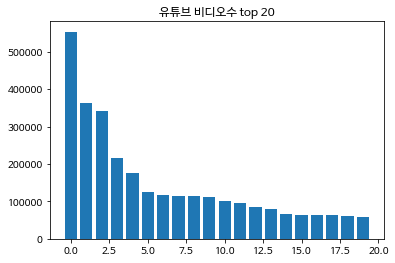

In [45]:
y = vt20.비디오수2
x = np.arange(len(y))
xlabel = vt20.index.to_list()

plt.title('유튜브 비디오수 top 20')
plt.bar(x, y)
plt.xtics(x, xlabel)
plt.xlabel('채널명')
plt.ylabel('뷰수')
plt.grid()
plt.show()

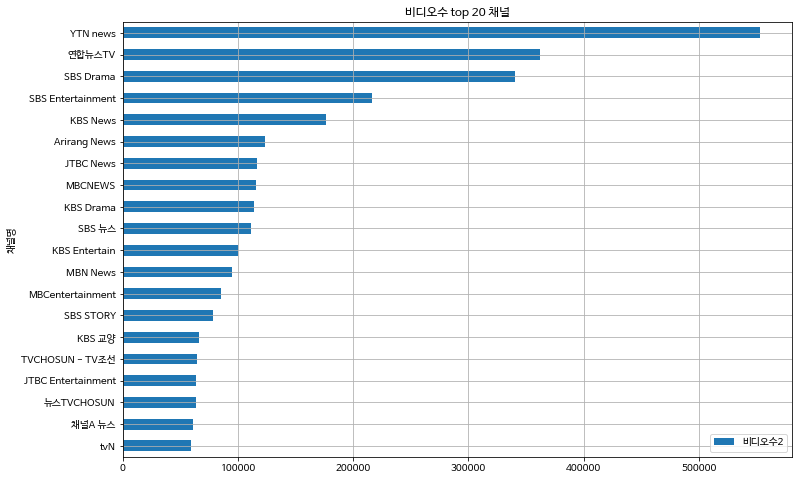

In [57]:
df2 = df[['채널명','비디오수2']].sort_values(by='비디오수2', ascending=False)
df2.set_index('채널명', inplace=True)
df2.head(20).sort_values(by='비디오수2').plot(kind='barh', grid=True, figsize=(12,8))
plt.title('비디오수 top 20 채널')
plt.show()

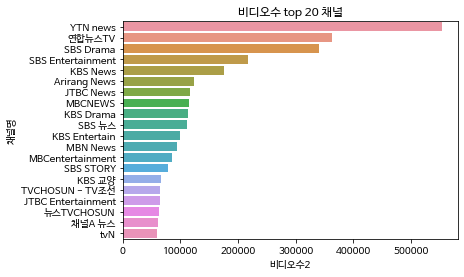

In [66]:
import seaborn as sns

df2 = df[['채널명','비디오수2']].sort_values(by='비디오수2', ascending=False)
sns.barplot(y='채널명', x='비디오수2', data=df2.head(20))
plt.title('비디오수 top 20 채널')
plt.show()